In [ ]:
!pip install matplotlib deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.3 MB/s eta 0:00:00


In [ ]:
#Required Libraries
import random
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)  # Define the coordinates for the depot, centrally located in this case
num_vehicles = 3

In [ ]:
# Genetic Algorithm Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
#TASK 2 - Finish setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
#HINT: Refer to the Maze Solver Code to see the templates. For more info, https://deap.readthedocs.io/en/master/api/base.html

In [ ]:
# Fitness Function
import math
from statistics import stdev
from itertools import cycle

# Function to calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)

# Fitness Function
def evalVRP(individual):
    # Split the individual's route into routes for each vehicle
    routes = [[] for _ in range(num_vehicles)]
    for loc, vehicle in zip(individual, cycle(range(num_vehicles))):
        routes[vehicle].append(loc)

    # Calculate the total distance for each vehicle's route
    total_distances = []
    for route in routes:
        if not route:  # Skip empty routes
            continue

        route_distance = 0
        # Distance from the depot to the first location
        route_distance += euclidean_distance(depot, locations[route[0]])
        # Distance between consecutive locations
        for i in range(len(route) - 1):
            route_distance += euclidean_distance(locations[route[i]], locations[route[i + 1]])
        # Distance from the last location back to the depot
        route_distance += euclidean_distance(locations[route[-1]], depot)

        total_distances.append(route_distance)

    # Calculate the total distance and the standard deviation among the distances
    total_distance = sum(total_distances)
    distance_std_dev = stdev(total_distances) if len(total_distances) > 1 else 0.0

    # Return the total distance and the standard deviation as the fitness values
    return (total_distance, distance_std_dev)

toolbox.register("evaluate", evalVRP)

# Example to test the fitness function
# Create a test individual



Fitness of the test individual: (749.71034417499, 32.13473899971444)


In [ ]:
# Genetic Operators
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
#Mating Methods for sequence of indices
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxPartialyMatched
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxUniformPartialyMatched
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.cxOrdered

#Mutation Methods for Sequences
#https://deap.readthedocs.io/en/master/api/tools.html#deap.tools.mutShuffleIndexes

<ipython-input-12-0d8b45e43194>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", num_vehicles)  # Get a colormap with enough colors for the vehicles


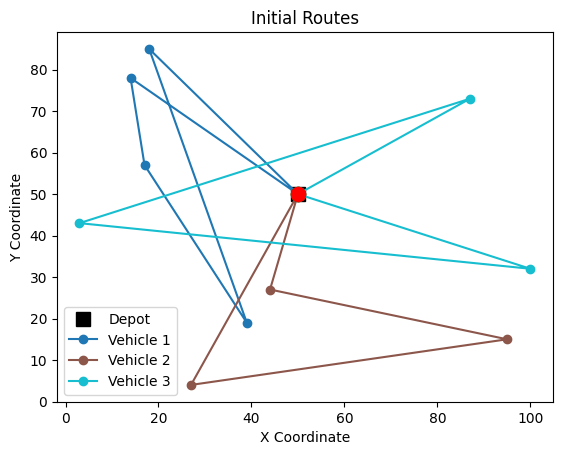

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_routes(individual, title="Routes"):
    colors = plt.cm.get_cmap("tab10", num_vehicles)  # Get a colormap with enough colors for the vehicles

    fig, ax = plt.subplots()

    # Plot the depot
    ax.plot(depot[0], depot[1], 'ks', markersize=10, label="Depot")  # 'ks' means black square

    # Split the individual's route into routes for each vehicle
    routes = [[] for _ in range(num_vehicles)]
    for loc, vehicle in zip(individual, cycle(range(num_vehicles))):
        routes[vehicle].append(loc)

    # Plot each vehicle's route
    for i, route in enumerate(routes):
        if not route:  # Skip empty routes
            continue

        route_coords = [depot] + [locations[loc] for loc in route] + [depot]
        x_coords, y_coords = zip(*route_coords)

        ax.plot(x_coords, y_coords, 'o-', color=colors(i), label=f"Vehicle {i + 1}")  # 'o-' means circle markers with lines
        ax.plot(x_coords[0], y_coords[0], 'go', markersize=10)  # Start point in green
        ax.plot(x_coords[-1], y_coords[-1], 'ro', markersize=10)  # End point in red

    # Add title and legend
    ax.set_title(title)
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.legend()

    plt.show()

# Example to test the plotting function
test_individual = toolbox.individual()
plot_routes(test_individual, "Initial Routes")


    #HINT: Refer to the Maze Solver in terms of how to plot and display. OR refer Pyplot docs - https://matplotlib.org/stable/tutorials/pyplot.html


gen	nevals	avg    	min     
0  	300   	367.436	0.786061
1  	218   	355.298	4.47131 
2  	240   	352.449	4.83127 
3  	240   	340.977	5.79229 
4  	233   	340.904	4.26432 
5  	229   	338.474	3.9194  
6  	222   	327.712	3.9194  
7  	239   	328.379	5.94849 
8  	226   	330.661	5.94849 
9  	239   	326.558	4.96745 
10 	233   	322.189	7.79393 
11 	229   	322.414	4.17044 
12 	229   	323.046	3.67092 
13 	227   	320.458	2.20464 
14 	207   	314.185	2.20464 
15 	233   	318.815	1.00147 
16 	227   	315.778	1.90771 
17 	228   	310.684	3.91651 
18 	243   	309.588	4.96745 
19 	237   	302.147	4.21833 
20 	238   	298.999	3.33953 
21 	242   	289.238	4.31933 
22 	224   	285.27 	5.62335 
23 	238   	284.244	5.62335 
24 	221   	281.227	1.86913 
25 	234   	281.283	2.20464 
26 	221   	279.18 	3.45894 
27 	229   	281.266	3.45894 
28 	217   	276.649	6.63782 
29 	247   	273.185	9.91293 
30 	233   	264.056	6.63627 
Best individual: [4, 0, 9, 8, 3, 2, 5, 7, 6, 1]
Best fitness: (409.1656218779857, 29.481560513560602)


<ipython-input-12-0d8b45e43194>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", num_vehicles)  # Get a colormap with enough colors for the vehicles


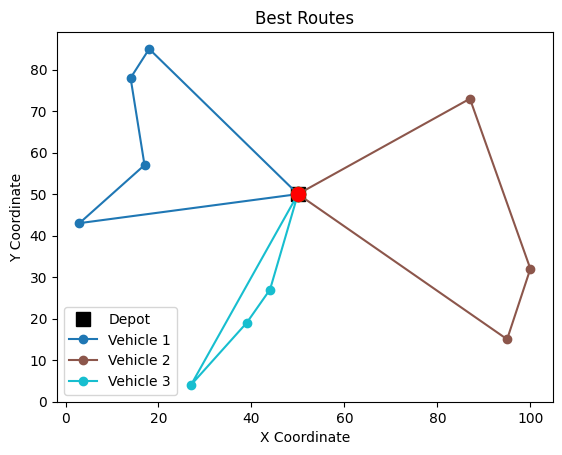

In [ ]:
# Running the Genetic Algorithm
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 30, stats=stats, halloffame=hof)
    #Refer eaSimple here - https://deap.readthedocs.io/en/master/api/algo.html

    return pop, stats, hof

if __name__ == "__main__":

   pop, stats, hof = main()
   print("Best individual:", hof[0])
   print("Best fitness:", hof[0].fitness.values)

    # Visualize the best routes
   plot_routes(hof[0], title="Best Routes")
    # TODO: Task 6 - Call the main function, run the algorithm and print the results

In [ ]:
def run_ga(pop_size=300, cxpb=0.7, mutpb=0.2, tournsize=3, generations=30):
    toolbox.register("select", tools.selTournament, tournsize=tournsize)
    pop = toolbox.population(n=pop_size)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    pop, log = algorithms.eaSimple(pop, toolbox, cxpb, mutpb, generations, stats=stats, halloffame=hof)
    return pop, log, hof


Testing configuration

Running GA with parameters: {'pop_size': 300, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 3}
gen	nevals	avg    	min   
0  	300   	367.458	2.0455
1  	236   	352.448	5.82189
2  	228   	342.953	2.38179
3  	238   	338.83 	2.41328
4  	235   	336.08 	2.12146
5  	228   	329.471	2.54913
6  	216   	319.651	2.54913
7  	230   	316.277	0.276239
8  	224   	307.732	2.54913 
9  	236   	301.625	2.41328 
10 	207   	292.208	4.06987 
11 	231   	285.293	4.82083 
12 	234   	285.714	4.82083 
13 	236   	283.345	2.75533 
14 	227   	276.814	4.82083 
15 	214   	265.999	4.82083 
16 	226   	260.862	4.2932  
17 	241   	251.75 	7.06207 
18 	204   	255.709	6.37911 
19 	224   	261.976	9.06106 
20 	232   	269.976	9.06106 
21 	232   	271.36 	7.95369 
22 	234   	271.551	7.06207 
23 	226   	271.089	4.48583 
24 	227   	266.624	6.09281 
25 	230   	276.191	4.04813 
26 	231   	274.278	6.09281 
27 	203   	270.779	9.86093 
28 	220   	266.423	2.88384 
29 	217   	248.775	9.63748 
30 	221   	241.958	6.37414 
Best individual for confi

<ipython-input-12-0d8b45e43194>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", num_vehicles)  # Get a colormap with enough colors for the vehicles


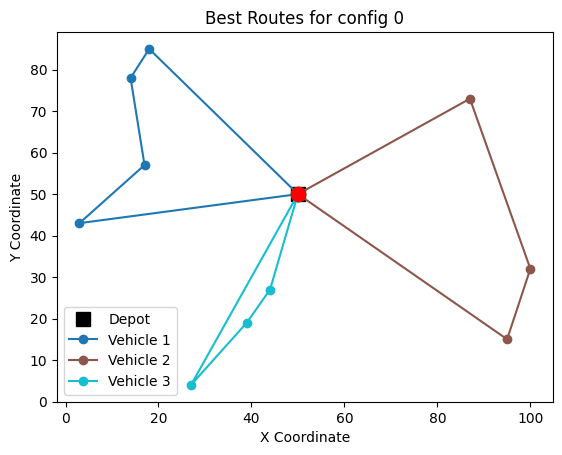

Running GA with parameters: {'pop_size': 500, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 3}
gen	nevals	avg    	min   
0  	500   	361.923	2.2585
1  	394   	350.079	1.82742
2  	358   	342.344	1.82742
3  	378   	338.677	1.82742
4  	394   	341.013	3.58225
5  	388   	336.401	2.79506
6  	372   	333.77 	2.53748
7  	371   	331.733	2.79506
8  	366   	326.403	2.39349
9  	367   	324.132	2.79506
10 	387   	323.964	4.43082
11 	401   	321.466	2.38162
12 	360   	317.117	1.24876
13 	399   	317.64 	2.10768
14 	361   	314.403	2.10768
15 	390   	317.243	2.10768
16 	372   	314.832	3.15449
17 	381   	311.334	4.28064
18 	379   	302.673	3.31588
19 	398   	298.661	3.13425
20 	388   	294.464	2.8911 
21 	384   	288.838	3.40954
22 	372   	282.147	2.33686
23 	352   	280.266	2.8911 
24 	384   	273.939	3.40954
25 	375   	269.335	3.19762
26 	388   	268.43 	1.35888
27 	388   	268.828	2.76668
28 	390   	267.613	5.72929
29 	373   	267.006	5.05562
30 	386   	264.726	6.12512
Best individual for config 1: [1, 2, 7, 5, 9, 3, 

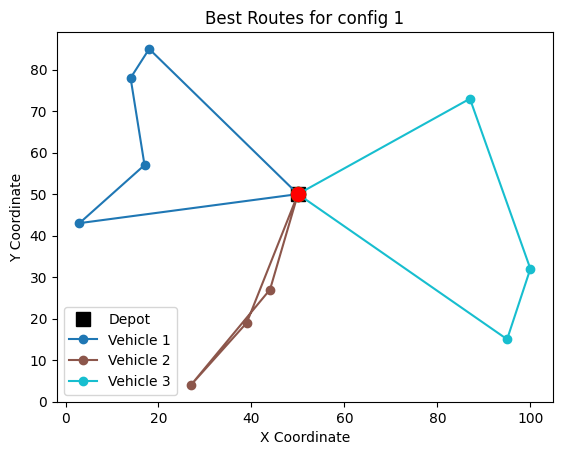

Running GA with parameters: {'pop_size': 300, 'cxpb': 0.8, 'mutpb': 0.1, 'tournsize': 3}
gen	nevals	avg    	min    
0  	300   	366.767	5.32209
1  	271   	350.844	7.88846
2  	264   	347.856	4.97319
3  	256   	344.825	3.67637
4  	238   	336.016	3.21493
5  	238   	331.645	3.21493
6  	249   	336.532	3.09699
7  	253   	332.809	1.44985
8  	253   	333.214	2.22249
9  	247   	333.867	5.10255
10 	236   	330.315	2.14353
11 	233   	320.201	0.545541
12 	239   	314.396	0.485438
13 	239   	318.966	2.26525 
14 	246   	313.141	3.38173 
15 	239   	316.897	2.18142 
16 	248   	315.613	2.75034 
17 	238   	317.566	2.75034 
18 	248   	312.808	2.18228 
19 	233   	310.45 	2.18228 
20 	252   	314.117	3.38173 
21 	250   	309.479	2.75034 
22 	248   	313.971	2.12132 
23 	240   	314.963	2.14353 
24 	236   	308.178	2.22249 
25 	248   	309.783	4.16244 
26 	248   	309.194	1.50062 
27 	238   	308.804	2.22249 
28 	240   	310.662	3.56669 
29 	234   	311.362	2.22249 
30 	249   	305.706	2.75825 
Best individual for config 

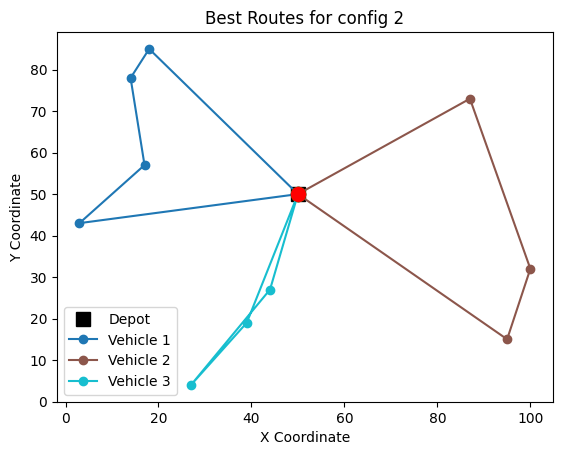

Running GA with parameters: {'pop_size': 300, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 5}
gen	nevals	avg    	min     
0  	300   	364.324	0.622109
1  	240   	350.21 	0.622109
2  	244   	341.888	2.87564 
3  	231   	332.745	4.90768 
4  	234   	329.428	1.38385 
5  	228   	321.11 	2.83336 
6  	226   	311.271	2.88384 
7  	219   	293.399	2.88384 
8  	222   	285.61 	4.79435 
9  	230   	289.059	5.53189 
10 	218   	278.738	6.22296 
11 	238   	259.984	3.86372 
12 	235   	259.108	7.06207 
13 	235   	262.013	1.849   
14 	214   	260.256	6.17736 
15 	229   	272.932	5.00497 
16 	229   	255.54 	1.96586 
17 	241   	244.506	2.86233 
18 	220   	242.707	9.87087 
19 	230   	244.795	7.71615 
20 	242   	251.349	8.28869 
21 	225   	240.774	2.18228 
22 	214   	238.986	7.10468 
23 	228   	236.214	3.56669 
24 	230   	245.382	5.87187 
25 	221   	252.22 	8.5339  
26 	240   	254.359	11.8563 
27 	244   	236.971	11.8563 
28 	229   	242.271	10.0393 
29 	222   	237.462	5.87187 
30 	226   	239.585	5.87187 
Best individual

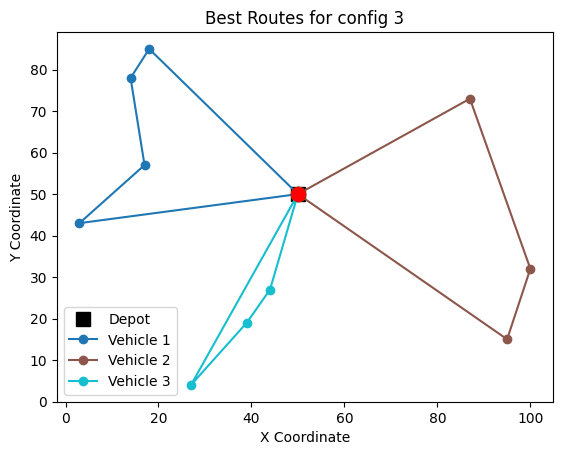

In [ ]:
if __name__ == "__main__":
    params = [
        {'pop_size': 300, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 3},
        {'pop_size': 500, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 3},
        {'pop_size': 300, 'cxpb': 0.8, 'mutpb': 0.1, 'tournsize': 3},
        {'pop_size': 300, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 5},
    ]

    for i, param in enumerate(params):
        print(f"Running GA with parameters: {param}")
        pop, log, hof = run_ga(**param)
        print(f"Best individual for config {i}: {hof[0]}")
        print(f"Best fitness for config {i}: {hof[0].fitness.values}")
        plot_routes(hof[0], title=f"Best Routes for config {i}")


#2.Fitness Score Analysis Over Generations

Running GA with parameters: {'pop_size': 300, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 3}
gen	nevals	avg    	min    
0  	300   	365.148	1.51762
1  	239   	353.47 	1.51762
2  	206   	341.703	2.07509
3  	227   	343.617	1.4707 
4  	227   	338.347	5.40752
5  	237   	337.963	0.704187
6  	225   	330.507	2.9036  
7  	213   	328.302	2.53493 
8  	250   	332.951	1.7498  
9  	227   	329.448	4.39659 
10 	232   	325.342	4.34449 
11 	230   	332.925	2.16896 
12 	217   	330.314	5.40951 
13 	252   	333.691	1.75109 
14 	251   	329.231	3.78987 
15 	225   	326.561	5.00181 
16 	232   	323.046	2.83336 
17 	232   	329.19 	2.01336 
18 	219   	323.812	5.49166 
19 	209   	313.456	3.14466 
20 	244   	320.656	4.13862 
21 	234   	322.834	4.67022 
22 	229   	318.319	8.00398 
23 	231   	315.345	4.52162 
24 	237   	318.753	7.40701 
25 	224   	309.979	7.43516 
26 	238   	308.536	6.02152 
27 	219   	299.524	5.84711 
28 	228   	295.932	2.41589 
29 	244   	286.75 	2.41589 
30 	234   	278.295	5.87187 
Best individual for c

<ipython-input-12-0d8b45e43194>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", num_vehicles)  # Get a colormap with enough colors for the vehicles


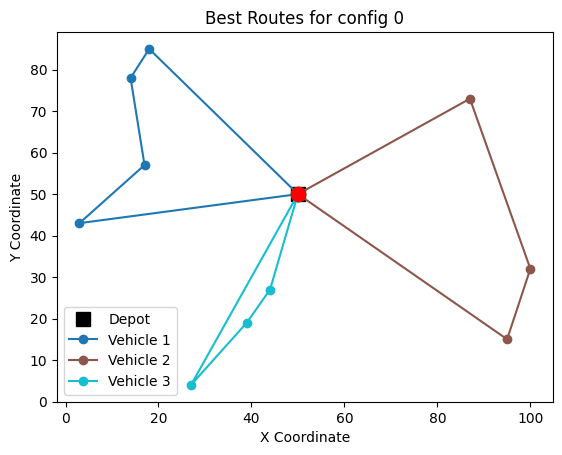

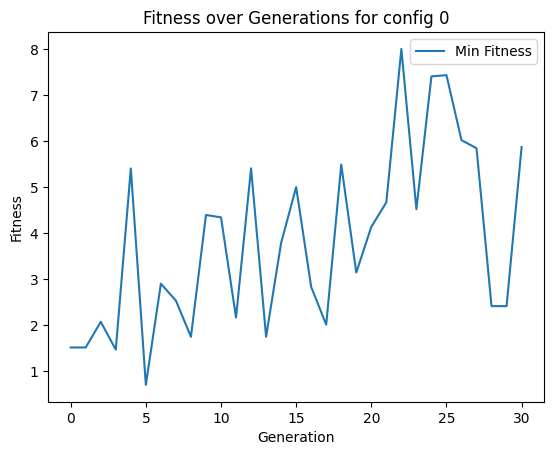

Running GA with parameters: {'pop_size': 500, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 3}
gen	nevals	avg   	min    
0  	500   	366.32	2.31184
1  	375   	351.891	3.96858
2  	402   	348.013	4.66703
3  	384   	345.564	3.09811
4  	374   	343.989	0.947153
5  	392   	338.409	2.18228 
6  	379   	337.902	2.18228 
7  	362   	336.023	2.07954 
8  	384   	335.671	2.18228 
9  	382   	334.73 	2.18228 
10 	379   	332.024	0.708341
11 	377   	333.431	0.708341
12 	350   	328.844	0.708341
13 	387   	325.523	0.708341
14 	388   	325.127	0.708341
15 	395   	321.013	2.18228 
16 	386   	323.857	1.00147 
17 	376   	324.729	2.18228 
18 	387   	321.255	1.49852 
19 	387   	321.945	2.18228 
20 	386   	325.231	0.764232
21 	362   	318.684	0.934028
22 	386   	317.905	2.1675  
23 	391   	321.066	0.708509
24 	366   	316.816	2.18228 
25 	395   	316.168	2.18228 
26 	376   	314.523	3.31    
27 	384   	316.699	2.18228 
28 	358   	316.183	2.39985 
29 	366   	310.284	0.708341
30 	378   	310.179	2.18228 
Best individual for co

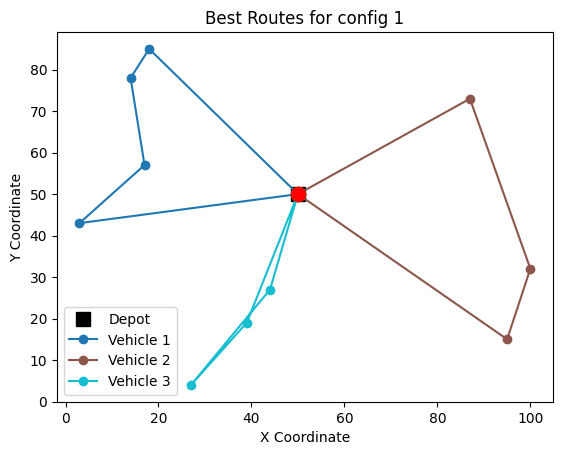

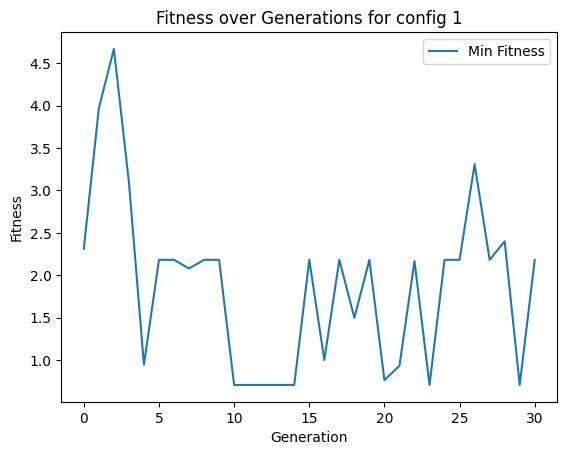

Running GA with parameters: {'pop_size': 300, 'cxpb': 0.8, 'mutpb': 0.1, 'tournsize': 3}
gen	nevals	avg    	min    
0  	300   	362.928	2.05325
1  	246   	351.701	2.08987
2  	236   	347.427	2.08987
3  	247   	344.541	2.25291
4  	241   	340.617	3.83437
5  	259   	337.776	3.69578
6  	247   	334.391	4.0535 
7  	245   	330.544	6.8442 
8  	241   	328.556	4.97811
9  	257   	333.647	0.939917
10 	258   	329.159	4.97811 
11 	241   	326.985	3.77046 
12 	244   	329.693	5.45418 
13 	254   	321.784	4.51602 
14 	241   	319.989	3.67662 
15 	246   	321.435	2.48383 
16 	235   	318.799	4.85845 
17 	238   	319.16 	4.31535 
18 	241   	312.359	2.48383 
19 	237   	304.806	2.48383 
20 	244   	298.743	2.32512 
21 	246   	299.28 	4.23319 
22 	250   	295.455	1.60207 
23 	229   	296.161	2.79506 
24 	238   	300.16 	2.79506 
25 	246   	302.127	0.708341
26 	241   	297.236	0.708341
27 	248   	299.226	3.26679 
28 	251   	299.128	3.26679 
29 	234   	295.554	3.26679 
30 	241   	295.35 	3.26679 
Best individual for confi

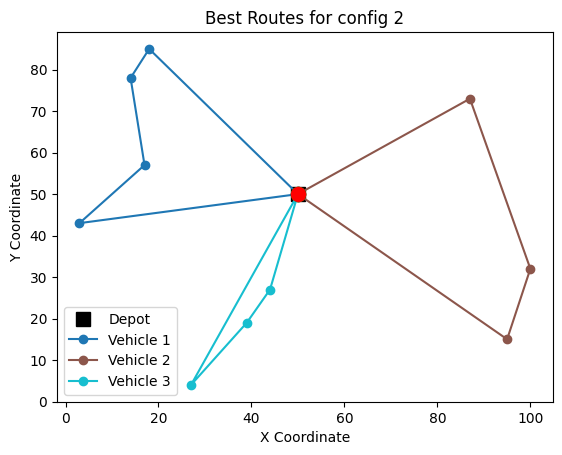

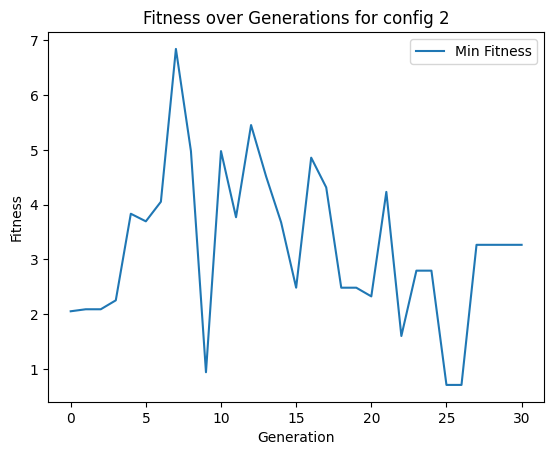

Running GA with parameters: {'pop_size': 300, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 5}
gen	nevals	avg    	min    
0  	300   	360.391	7.67303
1  	243   	347.111	3.03439
2  	229   	332.834	5.56009
3  	250   	332.764	2.73491
4  	238   	329.069	4.17044
5  	207   	318.339	2.65955
6  	230   	315.218	6.00271
7  	224   	316.807	4.42583
8  	240   	315.972	4.61883
9  	229   	307.308	6.25539
10 	225   	309.255	1.86726
11 	234   	300.263	3.13425
12 	217   	298.288	7.81231
13 	217   	291.31 	4.57986
14 	229   	289.266	4.57986
15 	212   	272.517	5.20226
16 	227   	253.431	8.57852
17 	211   	247.37 	8.22571
18 	239   	254.881	8.12022
19 	218   	260.71 	10.4944
20 	242   	264.804	8.15181
21 	212   	258.961	11.0833
22 	247   	253.741	7.69963
23 	210   	245.431	6.3925 
24 	241   	260.41 	9.93648
25 	214   	259.625	7.02168
26 	221   	259.152	10.8322
27 	227   	245.623	6.12663
28 	227   	240.168	3.69656
29 	232   	241.517	10.1447
30 	228   	240.407	5.55696
Best individual for config 3: [6, 7, 4, 2, 3, 8

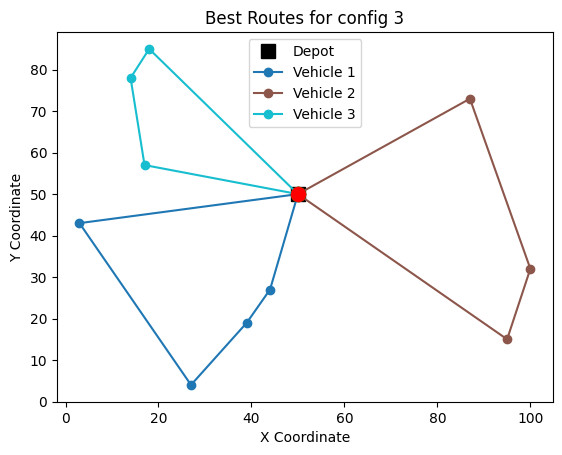

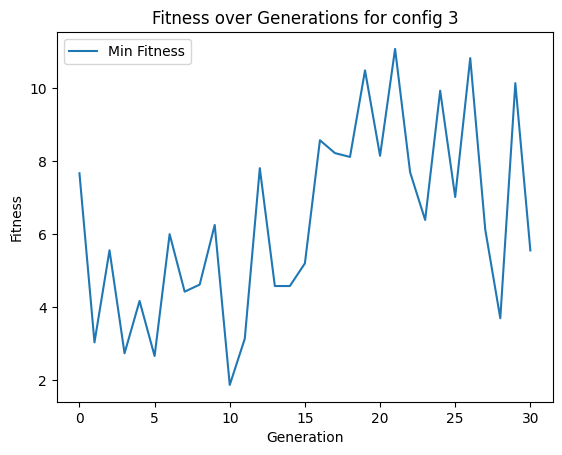

In [ ]:
import matplotlib.pyplot as plt

def plot_fitness_over_generations(log, title="Fitness over Generations"):
    generations = log.select("gen")
    fitness_min = log.select("min")

    plt.figure()
    plt.plot(generations, fitness_min, label="Min Fitness")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.title(title)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    for i, param in enumerate(params):
        print(f"Running GA with parameters: {param}")
        pop, log, hof = run_ga(**param)
        print(f"Best individual for config {i}: {hof[0]}")
        print(f"Best fitness for config {i}: {hof[0].fitness.values}")
        plot_routes(hof[0], title=f"Best Routes for config {i}")
        plot_fitness_over_generations(log, title=f"Fitness over Generations for config {i}")


#3. Solution Diversity Analysis

Running GA with parameters: {'pop_size': 300, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 3}
gen	nevals	avg    	min   
0  	300   	366.367	2.3847
1  	221   	354.829	2.07509
2  	242   	351.214	2.49946
3  	227   	338.98 	4.16244
4  	235   	340.409	4.99105
5  	206   	331.891	2.20464
6  	229   	325.268	2.20464
7  	232   	323.99 	3.21602
8  	211   	321.233	3.14468
9  	234   	321.459	0.667915
10 	233   	317.802	0.667915
11 	237   	310.233	3.26679 
12 	221   	310.319	3.26679 
13 	227   	300.852	2.66989 
14 	215   	286.047	4.5576  
15 	227   	275.125	4.18458 
16 	232   	269.025	2.41589 
17 	225   	273.307	2.41589 
18 	222   	272.354	5.12778 
19 	239   	274.018	3.56702 
20 	212   	276.085	8.32774 
21 	214   	263.937	4.18458 
22 	223   	264.642	1.95139 
23 	221   	255.88 	10.4469 
24 	221   	244.407	8.97655 
25 	215   	247.939	8.86883 
26 	240   	251.353	2.65195 
27 	236   	249.725	7.95369 
28 	234   	253.263	7.06207 
29 	223   	257.591	1.96586 
30 	228   	252.547	6.46779 
Best individual for config 

<ipython-input-12-0d8b45e43194>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab10", num_vehicles)  # Get a colormap with enough colors for the vehicles


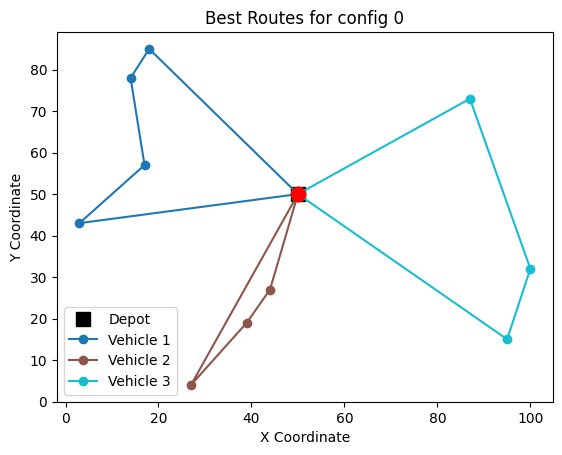

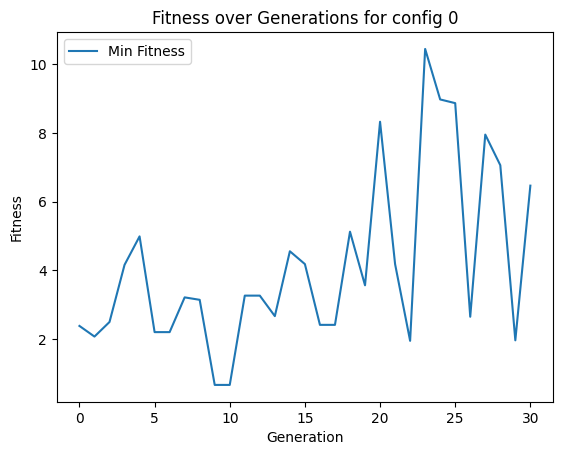

No valid populations found for config 0. Skipping diversity plot.
Running GA with parameters: {'pop_size': 500, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 3}
gen	nevals	avg    	min    
0  	500   	367.927	2.83573
1  	356   	351.363	1.7871 
2  	385   	347.151	3.94941
3  	379   	343.104	2.89139
4  	400   	342.565	2.39275
5  	386   	340.017	2.39275
6  	380   	335.894	2.46145
7  	385   	336.653	4.23363
8  	378   	334.861	3.09828
9  	371   	336.247	1.01403
10 	378   	330.015	2.12146
11 	381   	328.457	3.97149
12 	378   	325.068	3.67662
13 	385   	322.024	3.03213
14 	377   	320.503	1.35796
15 	376   	320.179	1.48545
16 	386   	315.285	1.48545
17 	397   	318.4  	4.16554
18 	390   	316.255	2.17028
19 	399   	315.527	2.8911 
20 	375   	311.281	1.83103
21 	369   	307.775	1.35796
22 	391   	309.189	2.79506
23 	369   	299.709	3.45894
24 	371   	294.755	4.37453
25 	388   	294.68 	2.18228
26 	366   	289.617	2.11674
27 	377   	285.048	2.18228
28 	378   	283.4  	2.18228
29 	372   	285.056	2.18228
30 	399 

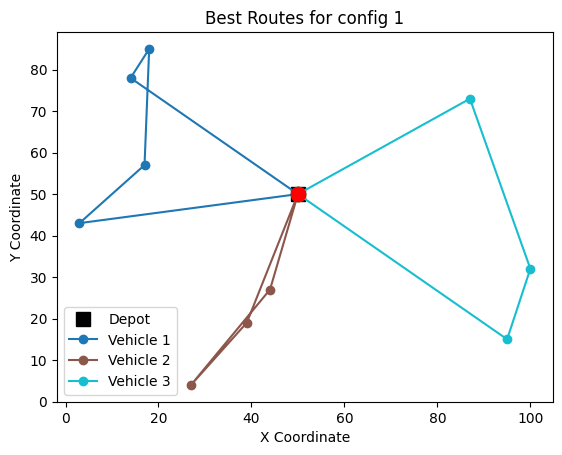

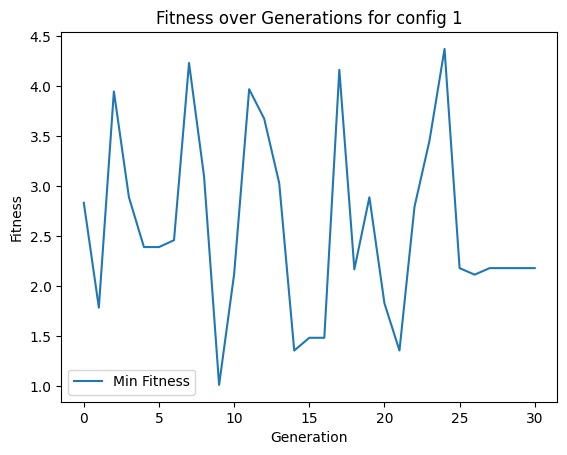

No valid populations found for config 1. Skipping diversity plot.
Running GA with parameters: {'pop_size': 300, 'cxpb': 0.8, 'mutpb': 0.1, 'tournsize': 3}
gen	nevals	avg   	min     
0  	300   	367.88	0.920638
1  	250   	358.41	0.920638
2  	251   	350.741	0.920638
3  	250   	345.649	3.70897 
4  	252   	340.256	5.60172 
5  	246   	333.996	3.08304 
6  	248   	332.017	0.896956
7  	242   	326.826	3.47871 
8  	244   	318.861	3.07081 
9  	269   	325.457	3.25248 
10 	251   	318.892	4.87138 
11 	264   	323.517	1.49828 
12 	239   	313.268	2.59281 
13 	233   	308.094	2.59281 
14 	253   	307.539	1.83103 
15 	250   	308.1  	7.50767 
16 	251   	305.318	1.88061 
17 	241   	298.724	4.06946 
18 	245   	292.047	7.79393 
19 	255   	284.631	3.16765 
20 	249   	265.429	5.20597 
21 	254   	256.332	5.10255 
22 	230   	243.342	9.50227 
23 	251   	247.139	10.3163 
24 	239   	238.411	11.8165 
25 	244   	235.74 	10.5758 
26 	232   	236.868	5.7574  
27 	245   	242.154	5.16362 
28 	238   	240.621	5.31544 
29 	228 

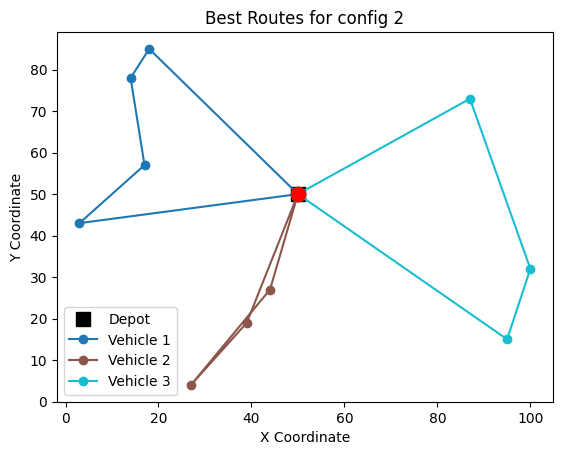

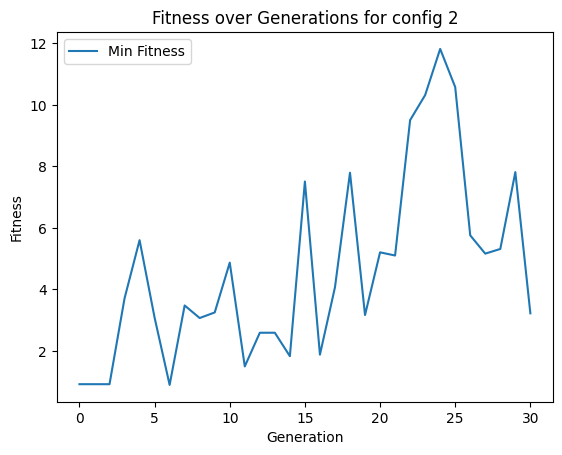

No valid populations found for config 2. Skipping diversity plot.
Running GA with parameters: {'pop_size': 300, 'cxpb': 0.7, 'mutpb': 0.2, 'tournsize': 5}
gen	nevals	avg    	min    
0  	300   	367.203	4.21833
1  	236   	347.517	4.11414
2  	231   	336.195	3.0985 
3  	240   	327.032	5.10711
4  	229   	321.866	3.26679
5  	234   	316.686	3.26679
6  	208   	302.294	0.708341
7  	220   	304.817	0.708341
8  	232   	299.131	1.28279 
9  	233   	290.507	3.56617 
10 	239   	276.882	4.78068 
11 	222   	263.661	3.46668 
12 	241   	268.353	7.59918 
13 	229   	267.949	0.678161
14 	235   	267.798	3.30955 
15 	230   	272.857	8.15181 
16 	216   	265.629	7.76859 
17 	234   	249.554	2.18228 
18 	234   	247.609	2.18228 
19 	243   	245.597	2.79506 
20 	242   	246.597	2.79506 
21 	233   	252.228	4.97242 
22 	229   	260.298	3.57094 
23 	238   	248.778	11.8563 
24 	241   	235.445	9.88841 
25 	225   	234.221	3.35803 
26 	231   	244.736	7.43918 
27 	225   	244.707	2.45937 
28 	229   	251.17 	11.0266 
29 	235   	2

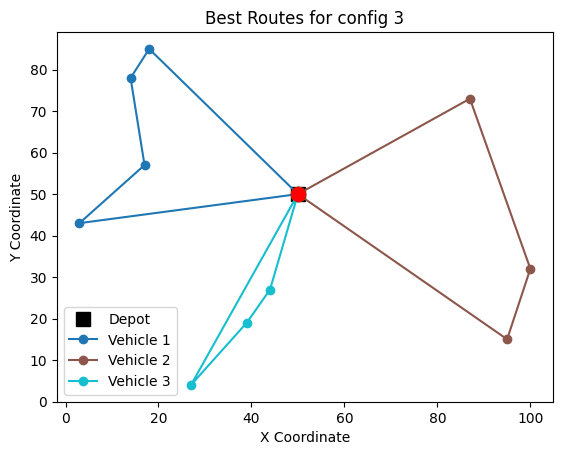

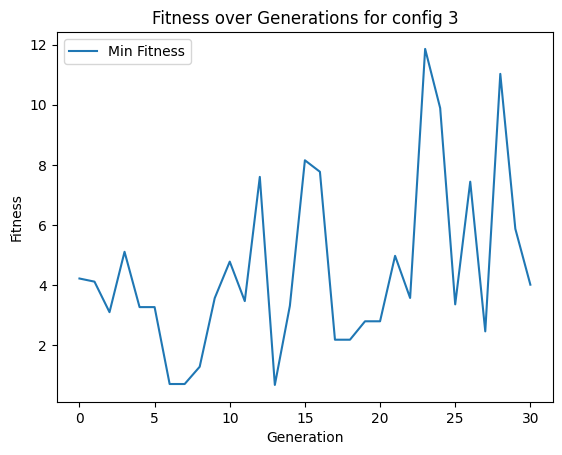

No valid populations found for config 3. Skipping diversity plot.


In [ ]:
def calculate_diversity(population):
  unique_individuals = len(set(tuple(ind) for ind in population))
  return unique_individuals / len(population)

def plot_diversity_over_generations(populations, title="Diversity over Generations"):
  generations = range(len(populations))
  diversity_scores = [calculate_diversity(pop) for pop in populations]

  plt.figure()
  plt.plot(generations, diversity_scores, label="Diversity Score")
  plt.xlabel("Generation")
  plt.ylabel("Diversity")
  plt.title(title)
  plt.legend()
  plt.show()

if __name__ == "__main__":
    for i, param in enumerate(params):
        print(f"Running GA with parameters: {param}")
        pop, log, hof = run_ga(**param)
        print(f"Best individual for config {i}: {hof[0]}")
        print(f"Best fitness for config {i}: {hof[0].fitness.values}")
        plot_routes(hof[0], title=f"Best Routes for config {i}")
        plot_fitness_over_generations(log, title=f"Fitness over Generations for config {i}")

        # Collect populations over generations
        populations = [log.select("pop")[gen] for gen in range(len(log)) if log.select("pop")[gen] is not None]

        if populations:  # Check if populations is not empty
            plot_diversity_over_generations(populations, title=f"Diversity over Generations for config {i}")
        else:
            print(f"No valid populations found for config {i}. Skipping diversity plot.")
